Considerando o simulador que o grupo escolheu no primeiro projeto, simule a fonte de ruído e gere 4 sinais senoidais com frequências de 1 kHz, 10 kHz, 50 kHz e 100 kHz. Após isso, projete dois filtros RC (um passa-baixa e outro passa-alta, ambos com frequência de 30 kHz) nas suas versões passivas e nas suas versões ativas com AmpOp. A seu critério, escolha os diversos outros parâmetros, se necessários, e os valores dos componentes. Faça uma análise em frequência das respostas dos filtros. Entrega: relatório e apresentação.

In [7]:
import numpy as np
import matplotlib.pyplot as plt

In [8]:
import os 
image_path = 'second_rapport/figures/'
os.makedirs(image_path, exist_ok=True)

Signal + Noise

In [9]:
# Creating the signal

fs = 1e6 # 1MHz Sampling frequency (Hz) > 2*100kHz
Ts = 1/fs # 1 us (sampling period)
T0 = 1e-3 # 1 ms (total time of the signal)
N = int(T0/Ts) # Number of samples


t = np.linspace(0, T0, N) # Time vector
signals = {
    '1kHz': np.sin(2*np.pi*1e3*t),
    '10kHz': np.sin(2*np.pi*10e3*t),
    '50kHz': np.sin(2*np.pi*50e3*t),
    '100kHz': np.sin(2*np.pi*100e3*t)
}

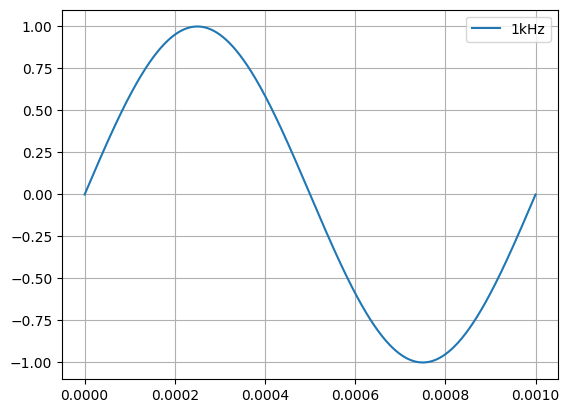

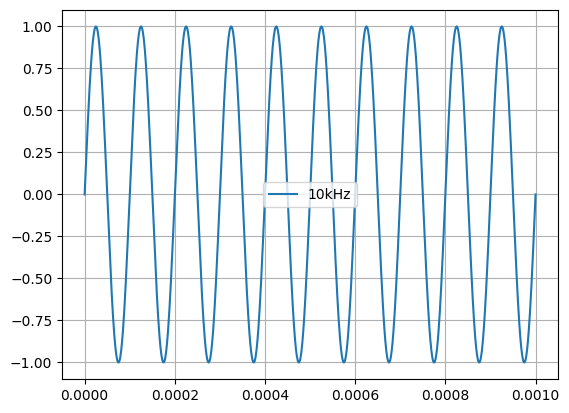

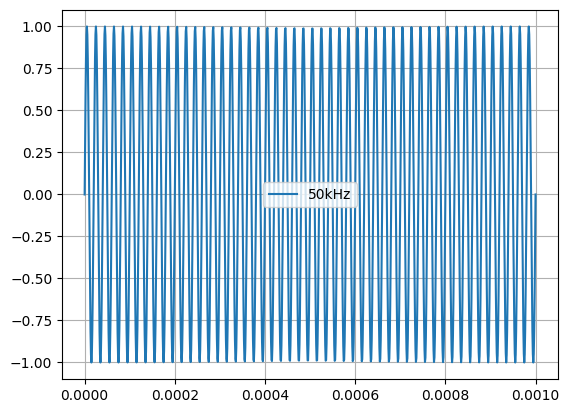

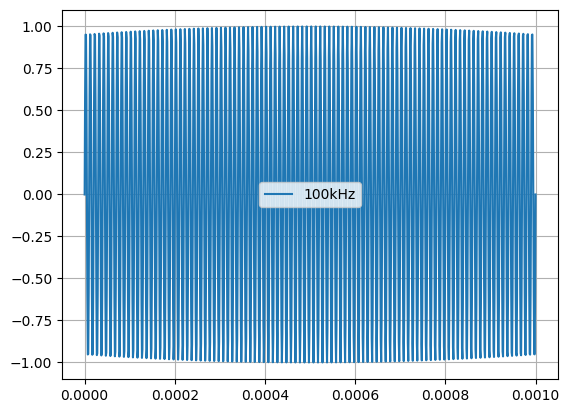

In [10]:
for key in signals:
    plt.figure()
    plt.plot(t, signals[key], label=key)
    plt.legend()
    plt.grid()
    plt.savefig(image_path+f'signal_{key}.png')

In [11]:
# Generate gaussian noise
np.random.seed(42)
mu = 0  # mean
sigma = 0.5  # standard deviation
white_noise = np.random.normal(mu, sigma, N)

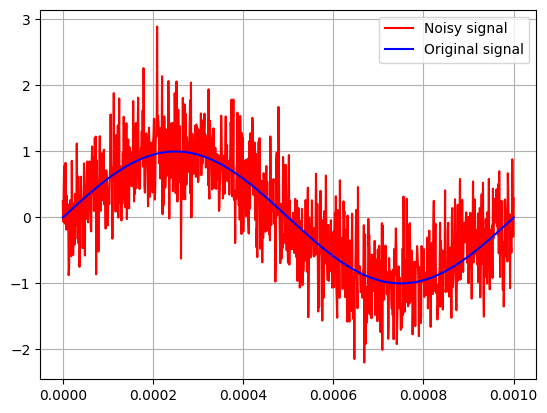

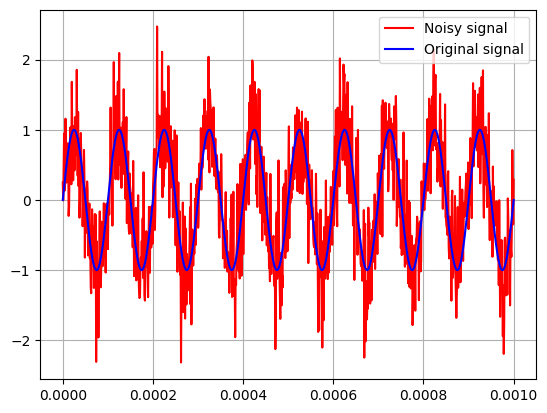

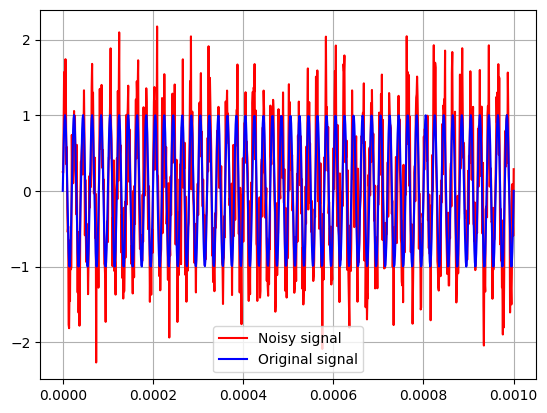

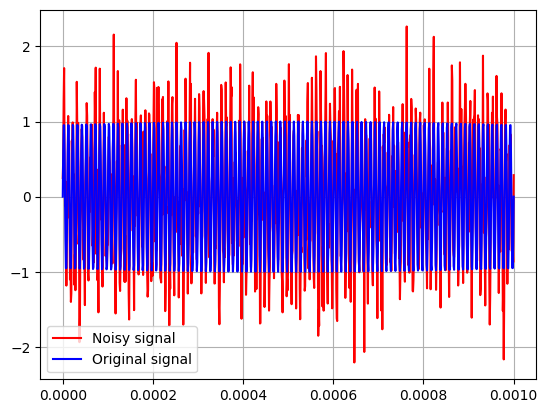

In [12]:
noisy_signals = {}

for key in signals.keys():
    noisy_signals[key] = signals[key] + white_noise
    plt.figure()
    plt.plot(t, noisy_signals[key], label='Noisy signal', color='r')
    plt.plot(t, signals[key], label='Original signal', color='b')
    plt.legend()
    plt.grid()
    plt.savefig(image_path+f'signal_noisy_{key}.png')


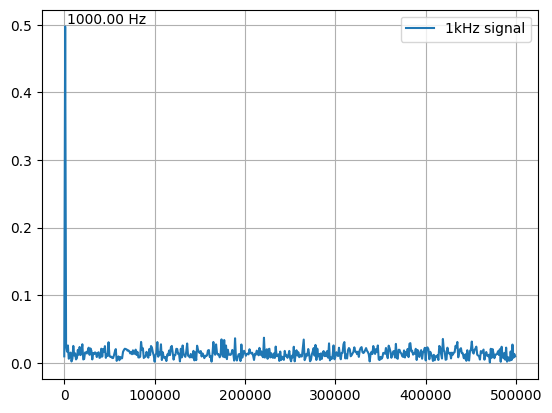

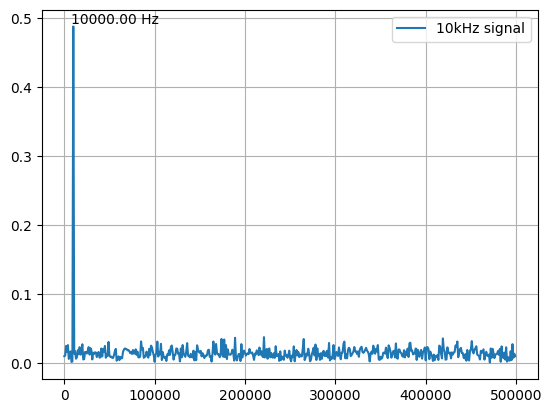

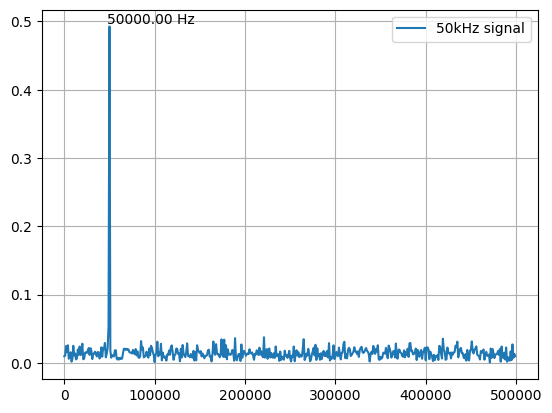

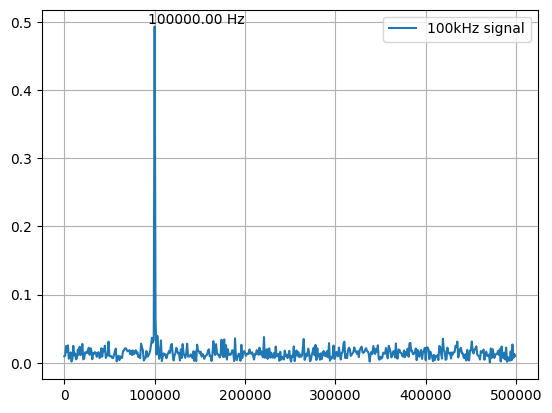

In [13]:
# Obtain the noise signal in the frequency domain
all_freqs = np.fft.fftfreq(N, Ts)
freq_domain_signals = {}

freqs = all_freqs[:N//2]

for key in noisy_signals.keys():

     # obtain the frequency domain signal
     freq_domain_signals[key] = np.fft.fft(noisy_signals[key])
     abs_freq_domain_signal = np.abs(freq_domain_signals[key])[:N//2]/N

     # obtain the peak frequency
     max_index = np.argmax(abs_freq_domain_signal)
     max_freq = freqs[max_index]
     peak = abs_freq_domain_signal[max_index]

     plt.figure()
     plt.plot(freqs, abs_freq_domain_signal, label=f'{key} signal')
     plt.annotate(f'{max_freq:.2f} Hz', (max_freq, peak), textcoords="offset points", xytext=(30,2), ha='center')
     plt.legend()
     plt.grid()
     plt.savefig(image_path+f'fft_signal_noisy_{key}.png')

## Passive low-pass Filter RC

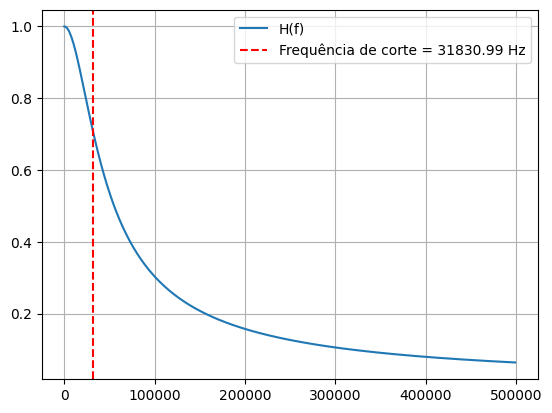

In [14]:
# creating the passive low pass filter RC
R = 5e3 # 5k Ohm
C = 1e-9 # 1pF

fc = 1/(2*np.pi*R*C) # cutoff frequency
s = 2j*np.pi*all_freqs # s = jw complex frequency vector
num = -1/(R*C)
den = s - 1/(R*C)
H = num/den

points_in_graph = 500
plt.plot(freqs[:points_in_graph], np.abs(H)[:points_in_graph], label='H(f)')
plt.axvline(x=fc, color='r', linestyle='--', label=f'Frequência de corte = {fc:.2f} Hz')
plt.legend()
plt.grid()
plt.savefig(image_path+f'Hf_passive_low_pass_{key}.png')

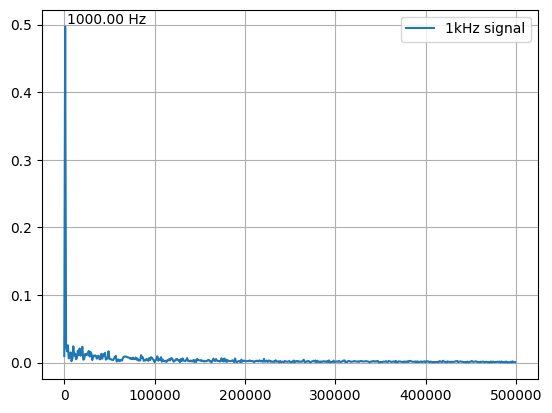

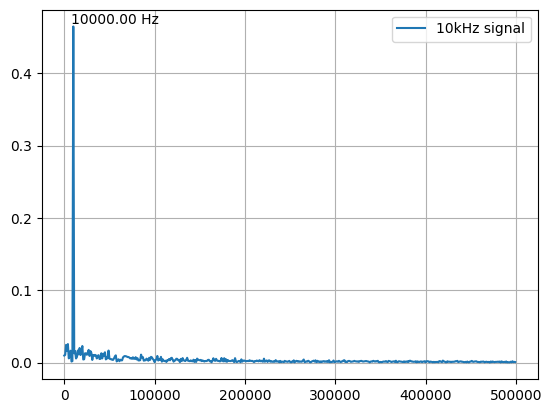

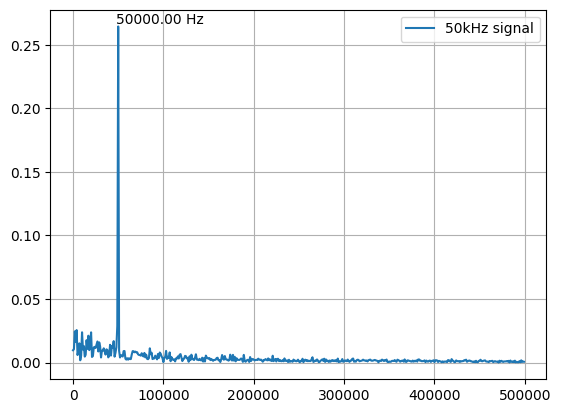

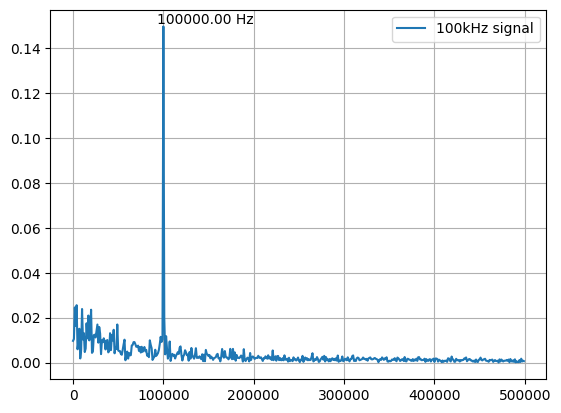

In [15]:
fft_filtered_signals = {}

for key in signals.keys():
    fft_filtered_signals[key] = H * freq_domain_signals[key]
    abs_fft_filtered_signal = np.abs(fft_filtered_signals[key])[:N//2]/N

     # obtain the peak frequency
    max_index = np.argmax(abs_fft_filtered_signal)
    max_freq = freqs[max_index]
    peak = abs_fft_filtered_signal[max_index]

    # plot the filtered signal
    plt.figure()
    plt.plot(freqs, abs_fft_filtered_signal, label=f'{key} signal')
    plt.annotate(f'{max_freq:.2f} Hz', (max_freq, peak), textcoords="offset points", xytext=(30,2), ha='center')
    plt.legend()
    plt.grid()
    plt.savefig(image_path+f'fft_denoised_signal_passive_low_pass_{key}.png')

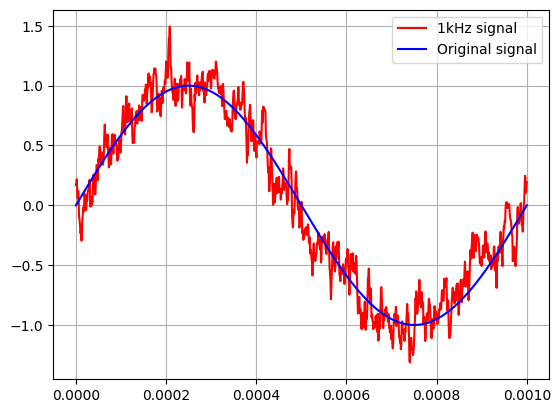

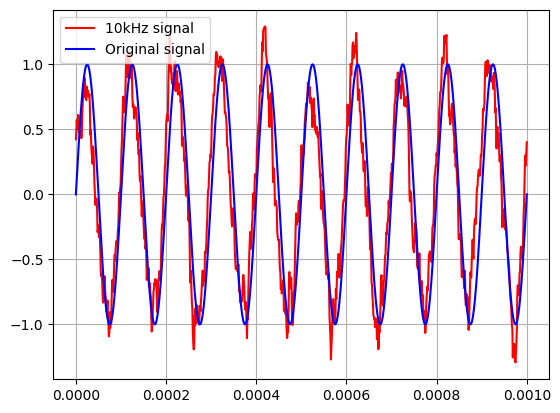

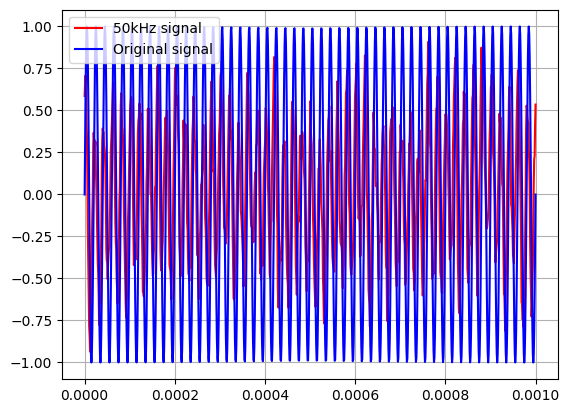

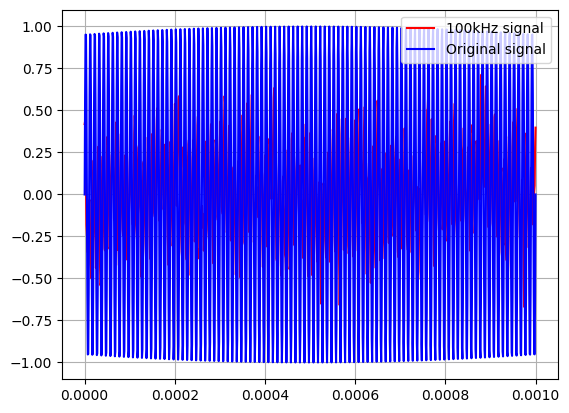

In [16]:
# obtain the time domain signal
filtered_signals = {}

for key in fft_filtered_signals.keys():
    filtered_signals[key] = np.fft.ifft(fft_filtered_signals[key])
    filtered_signals[key] = np.real(filtered_signals[key])
    plt.figure()
    plt.plot(t, filtered_signals[key], label=f'{key} signal', color='r')
    plt.plot(t, signals[key], label='Original signal', color='b')
    plt.legend()
    plt.grid()
    plt.savefig(image_path+f'denoised_signal_passive_low_pass_{key}.png')

## Active low-pass filter RC

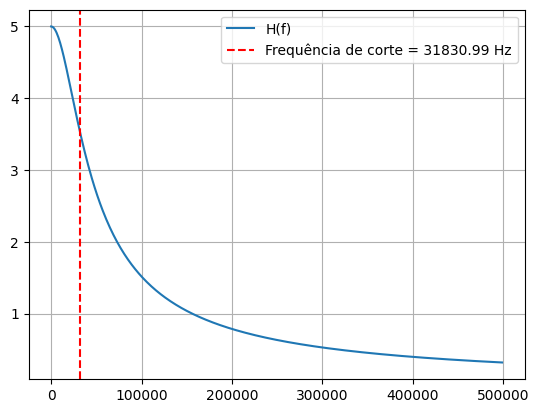

In [17]:
# creating the active low pass filter RC
R1 = 1e3 # 5k Ohm
R2 = 5e3 # 5k Ohm
C = 1e-9 # 1pF

fc = 1/(2*np.pi*R2*C) # cutoff frequency
s = 2j*np.pi*all_freqs # s = jw complex frequency vector
num = -1/(R1*C)
den = s - 1/(R2*C)
H = num/den

points_in_graph = 500
plt.plot(freqs[:points_in_graph], np.abs(H)[:points_in_graph], label='H(f)')
plt.axvline(x=fc, color='r', linestyle='--', label=f'Frequência de corte = {fc:.2f} Hz')
plt.legend()
plt.grid()
plt.savefig(image_path+f'Hf_active_low_pass_{key}.png')

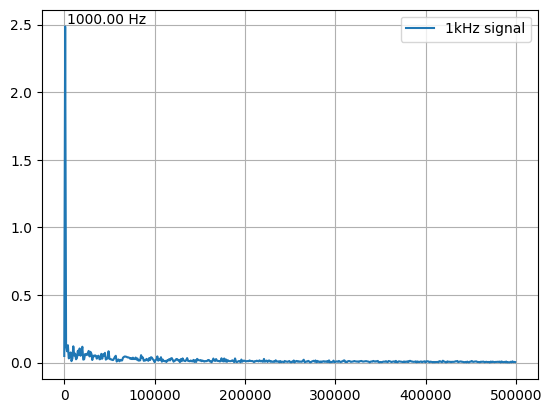

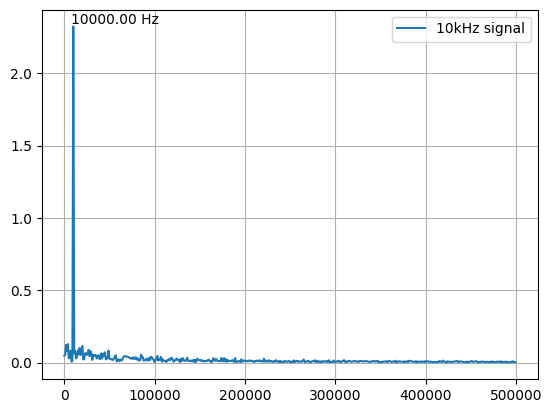

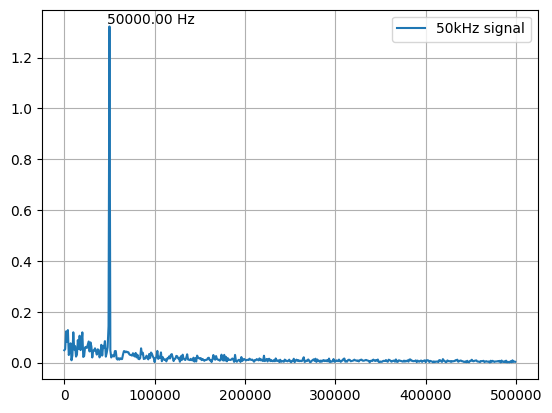

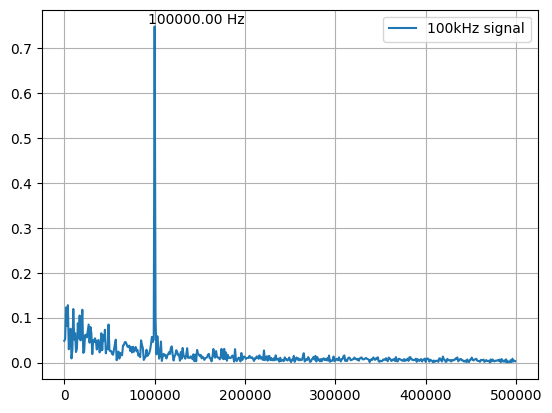

In [18]:
fft_filtered_signals = {}

for key in signals.keys():
    fft_filtered_signals[key] = H * freq_domain_signals[key]
    abs_fft_filtered_signal = np.abs(fft_filtered_signals[key])[:N//2]/N

     # obtain the peak frequency
    max_index = np.argmax(abs_fft_filtered_signal)
    max_freq = freqs[max_index]
    peak = abs_fft_filtered_signal[max_index]

    # plot the filtered signal
    plt.figure()
    plt.plot(freqs, abs_fft_filtered_signal, label=f'{key} signal')
    plt.annotate(f'{max_freq:.2f} Hz', (max_freq, peak), textcoords="offset points", xytext=(30,2), ha='center')
    plt.legend()
    plt.grid()
    plt.savefig(image_path+f'fft_denoised_signal_active_low_pass_{key}.png')

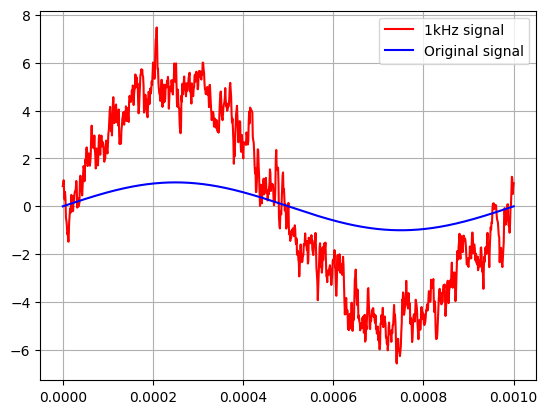

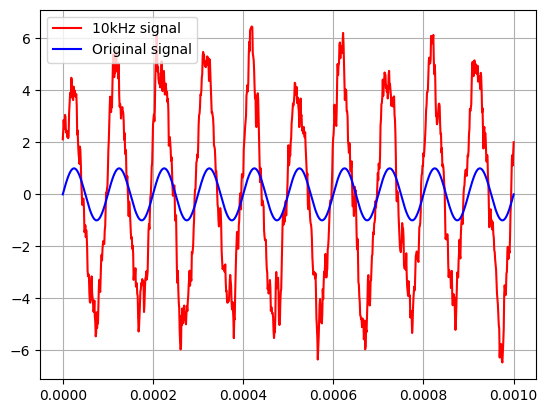

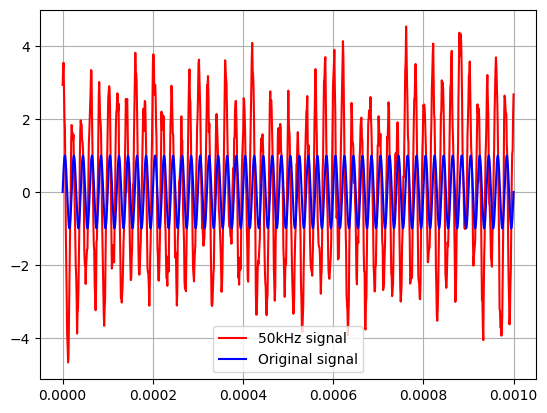

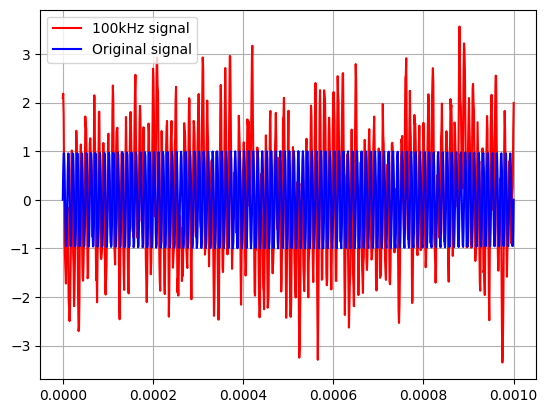

In [19]:
# obtain the time domain signal
filtered_signals = {}

for key in fft_filtered_signals.keys():
    filtered_signals[key] = np.fft.ifft(fft_filtered_signals[key])
    filtered_signals[key] = np.real(filtered_signals[key])
    plt.figure()
    plt.plot(t, filtered_signals[key], label=f'{key} signal', color='r')
    plt.plot(t, signals[key], label='Original signal', color='b')
    plt.legend()
    plt.grid()
    plt.savefig(image_path+f'denoised_signal_active_low_pass_{key}.png')

## Passive high-pass Filter

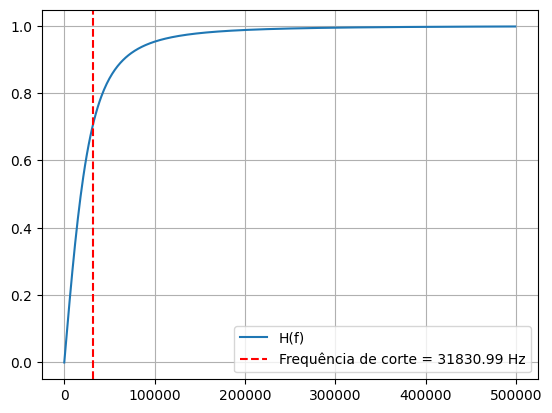

In [20]:
# creating the passive low pass filter RC
R = 5e3 # 5k Ohm
C = 1e-9 # 1pF

fc = 1/(2*np.pi*R*C) # cutoff frequency
s = 2j*np.pi*all_freqs # s = jw complex frequency vector

num = s
den = s + 1/(R*C)
H = num/den

points_in_graph = 500
plt.plot(freqs[:points_in_graph], np.abs(H)[:points_in_graph], label='H(f)')
plt.axvline(x=fc, color='r', linestyle='--', label=f'Frequência de corte = {fc:.2f} Hz')
plt.legend()
plt.grid()
plt.savefig(image_path+f'hf_passive_high_pass_{key}.png')

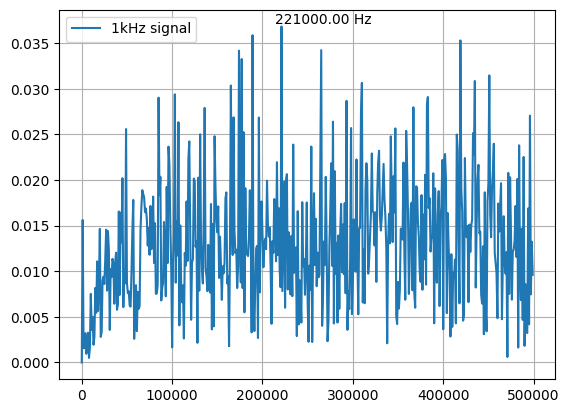

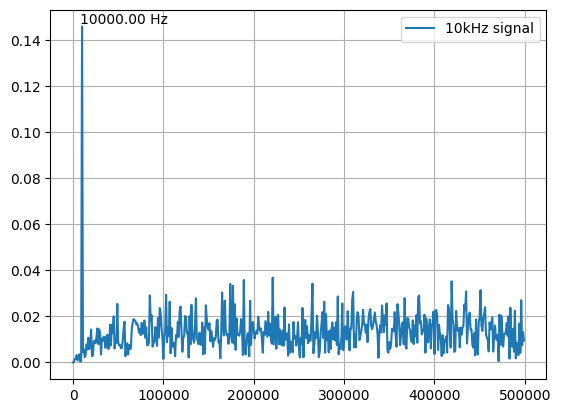

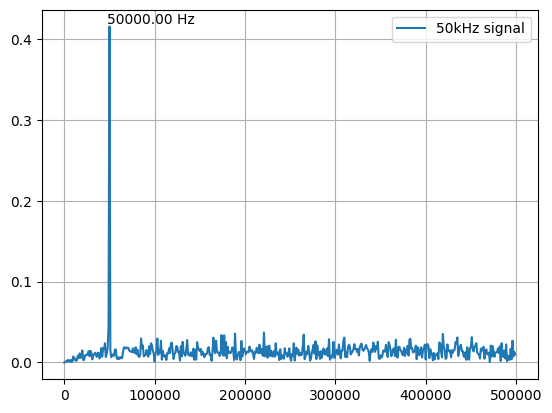

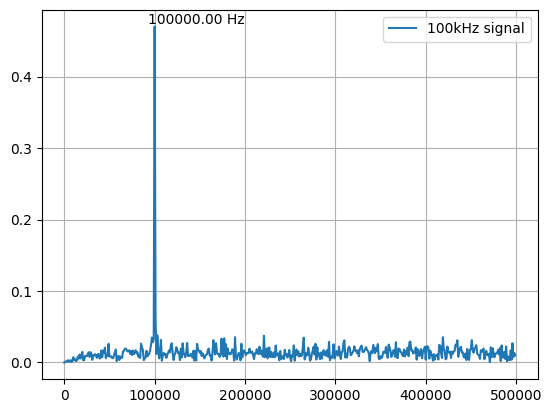

In [21]:
fft_filtered_signals = {}

for key in signals.keys():
    fft_filtered_signals[key] = H * freq_domain_signals[key]
    abs_fft_filtered_signal = np.abs(fft_filtered_signals[key])[:N//2]/N

     # obtain the peak frequency
    max_index = np.argmax(abs_fft_filtered_signal)
    max_freq = freqs[max_index]
    peak = abs_fft_filtered_signal[max_index]

    # plot the filtered signal
    plt.figure()
    plt.plot(freqs, abs_fft_filtered_signal, label=f'{key} signal')
    plt.annotate(f'{max_freq:.2f} Hz', (max_freq, peak), textcoords="offset points", xytext=(30,2), ha='center')
    plt.legend()
    plt.grid()
    plt.savefig(image_path+f'fft_denoised_signal_passive_high_pass_{key}.png')

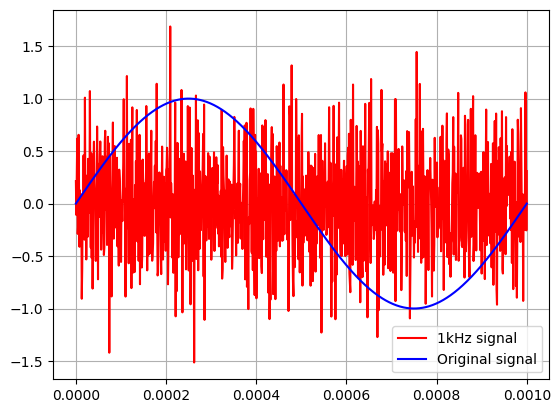

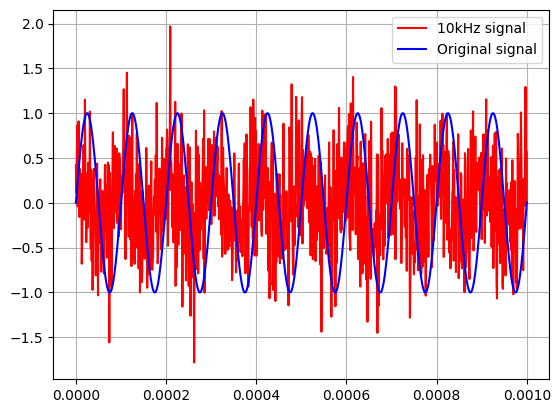

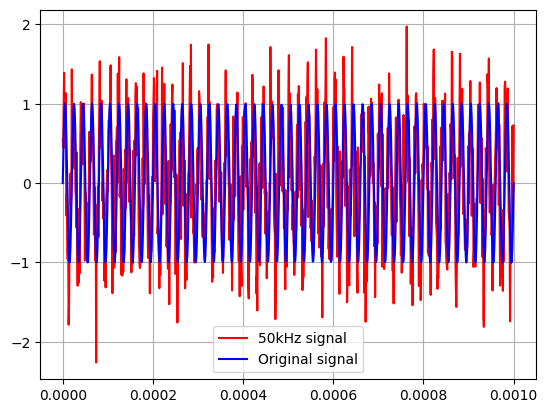

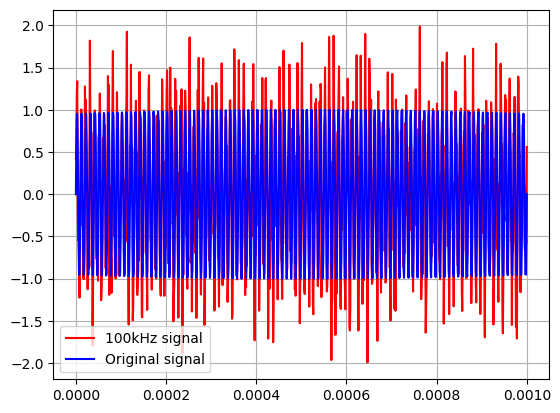

In [22]:
# obtain the time domain signal
filtered_signals = {}

for key in fft_filtered_signals.keys():
    filtered_signals[key] = np.fft.ifft(fft_filtered_signals[key])
    filtered_signals[key] = np.real(filtered_signals[key])
    plt.figure()
    plt.plot(t, filtered_signals[key], label=f'{key} signal', color='r')
    plt.plot(t, signals[key], label='Original signal', color='b')
    plt.legend()
    plt.grid()
    plt.savefig(image_path+f'denoised_signal_passive_high_pass_{key}.png')

## Active high-pass filter

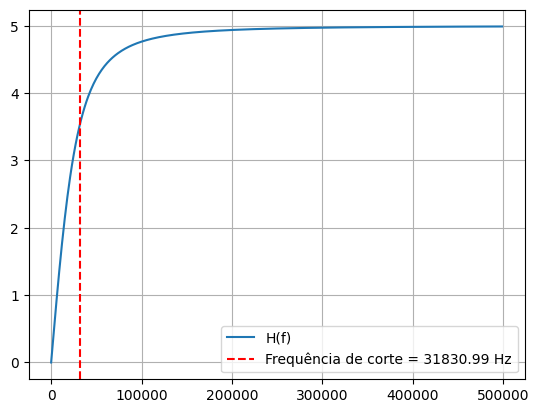

In [23]:
# creating the active low pass filter RC
R1 = 5e3 # 5k Ohm
R2 = 25e3 # 25k Ohm
C = 1e-9 # 1pF

fc = 1/(2*np.pi*R1*C) # cutoff frequency
s = 2j*np.pi*all_freqs # s = jw complex frequency vector
num = -1*s*R2/R1
den = s + 1/(R1*C)
H = num/den

points_in_graph = 500
plt.plot(freqs[:points_in_graph], np.abs(H)[:points_in_graph], label='H(f)')
plt.axvline(x=fc, color='r', linestyle='--', label=f'Frequência de corte = {fc:.2f} Hz')
plt.legend()
plt.grid()
plt.savefig(image_path+f'hf_active_high_pass_{key}.png')

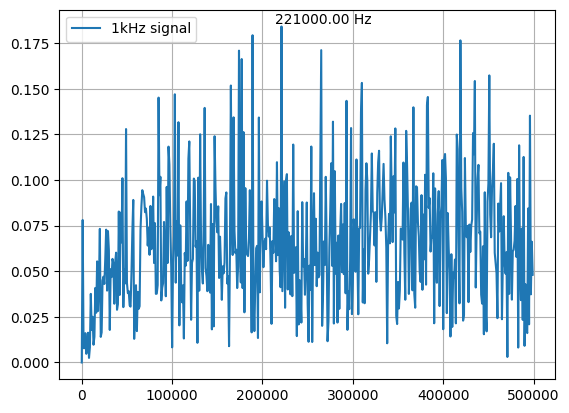

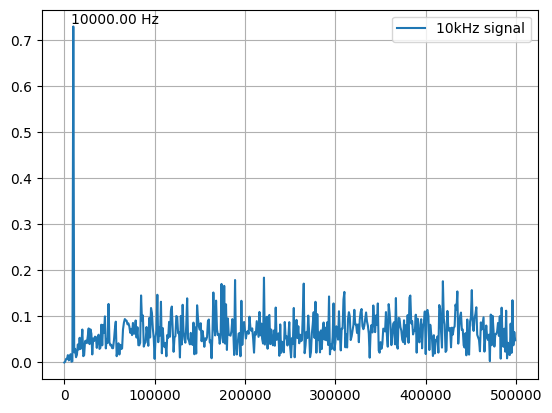

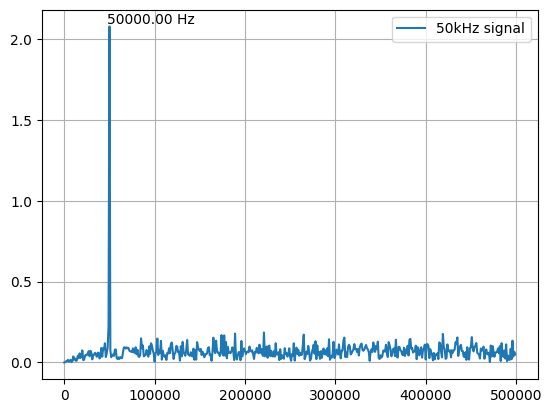

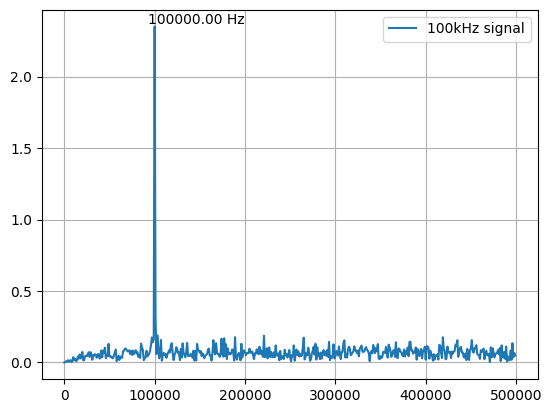

In [24]:
fft_filtered_signals = {}

for key in signals.keys():
    fft_filtered_signals[key] = H * freq_domain_signals[key]
    abs_fft_filtered_signal = np.abs(fft_filtered_signals[key])[:N//2]/N

     # obtain the peak frequency
    max_index = np.argmax(abs_fft_filtered_signal)
    max_freq = freqs[max_index]
    peak = abs_fft_filtered_signal[max_index]

    # plot the filtered signal
    plt.figure()
    plt.plot(freqs, abs_fft_filtered_signal, label=f'{key} signal')
    plt.annotate(f'{max_freq:.2f} Hz', (max_freq, peak), textcoords="offset points", xytext=(30,2), ha='center')
    plt.legend()
    plt.grid()
    plt.savefig(image_path+f'fft_denoised_signal_active_high_pass_{key}.png')

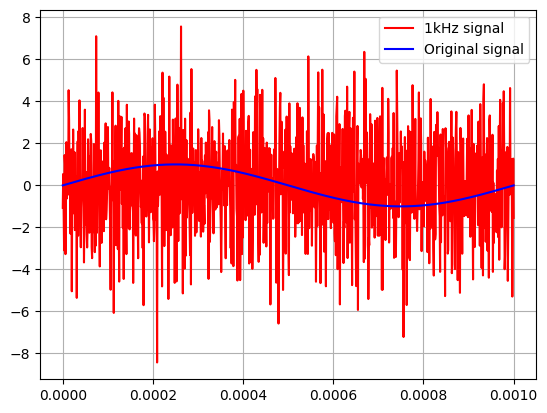

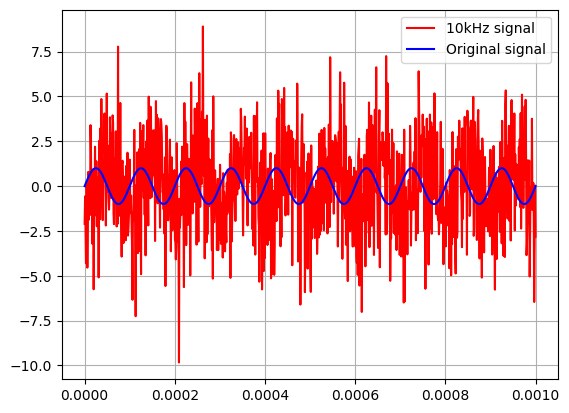

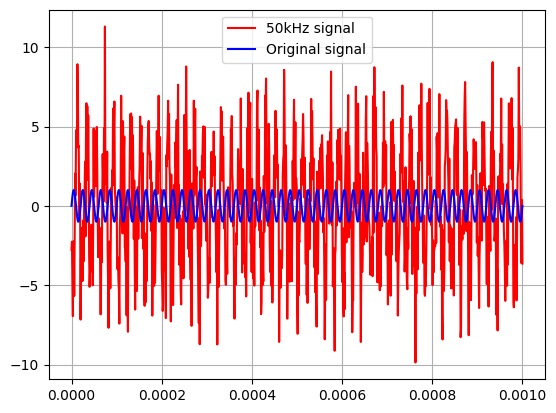

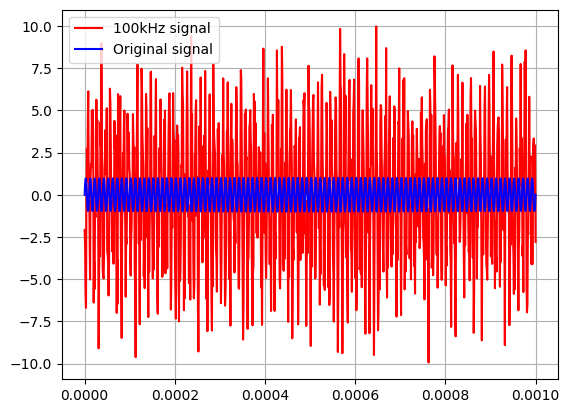

In [25]:
# obtain the time domain signal
filtered_signals = {}

for key in fft_filtered_signals.keys():
    filtered_signals[key] = np.fft.ifft(fft_filtered_signals[key])
    filtered_signals[key] = np.real(filtered_signals[key])
    plt.figure()
    plt.plot(t, filtered_signals[key], label=f'{key} signal', color='r')
    plt.plot(t, signals[key], label='Original signal', color='b')
    plt.legend()
    plt.grid()
    plt.savefig(image_path+f'denoised_signal_active_high_pass_{key}.png')